Import Modules

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import librosa ##for reading input audio files.
import librosa.display
from IPython.display import Audio #for playing audio files.

Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [4]:
paths=[]
labels=[]
for dirname, _,filenames in os.walk('Desktop/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split("_")[-1]
        label=label.split(".")[0]
        labels.append(label.lower())

In [5]:
paths[:5]

['Desktop/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'Desktop/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'Desktop/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'Desktop/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'Desktop/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [6]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [59]:
##creating a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df

,speech,label
0,Desktop/TESS Toronto emotional speech set data...,angry
1,Desktop/TESS Toronto emotional speech set data...,angry
2,Desktop/TESS Toronto emotional speech set data...,angry
3,Desktop/TESS Toronto emotional speech set data...,angry
4,Desktop/TESS Toronto emotional speech set data...,angry
...,...,...
2795,Desktop/TESS Toronto emotional speech set data...,sad
2796,Desktop/TESS Toronto emotional speech set data...,sad
2797,Desktop/TESS Toronto emotional speech set data...,sad
2798,Desktop/TESS Toronto emotional speech set data...,sad


In [8]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

**Exploratory data analysis**

<Axes: xlabel='label', ylabel='count'>

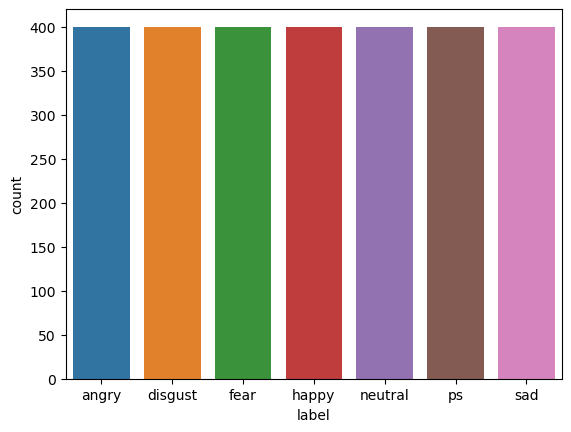

In [9]:
sns.countplot(x=df['label'])

In [10]:
##for displaying waveplot
def waveplot(data, sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
##for displaying spectogram
def spectogram(data,sr,emotion):
    x=librosa.stft(data)##which shows signal in time frequency domain
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

In [11]:
emotion = 'angry'
path = df['speech'][df['label']==emotion][0]
path

'Desktop/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav'

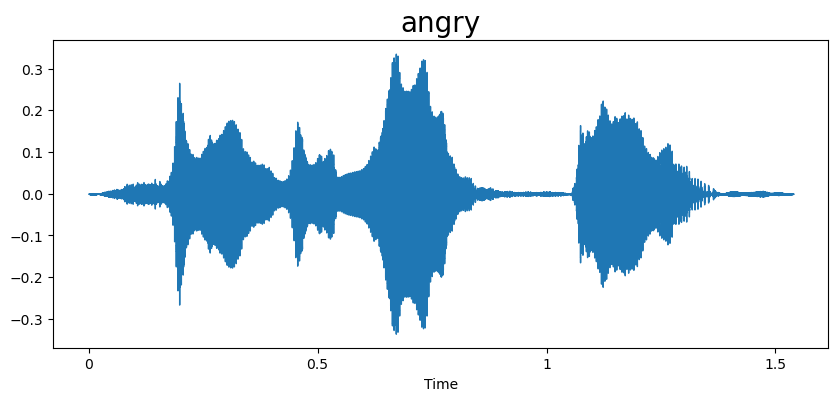

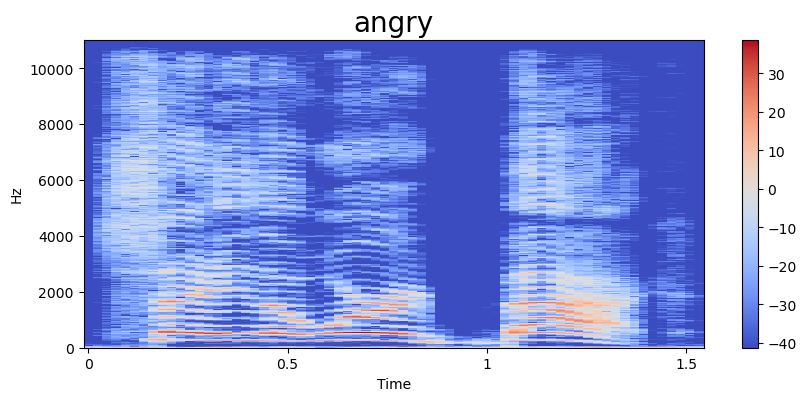

In [12]:
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

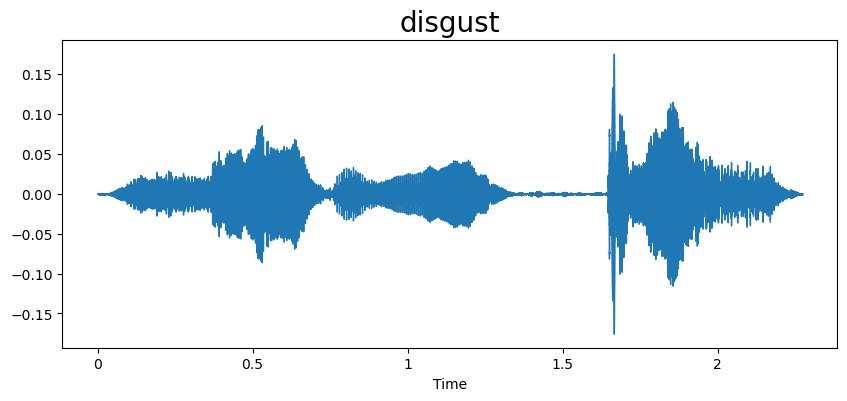

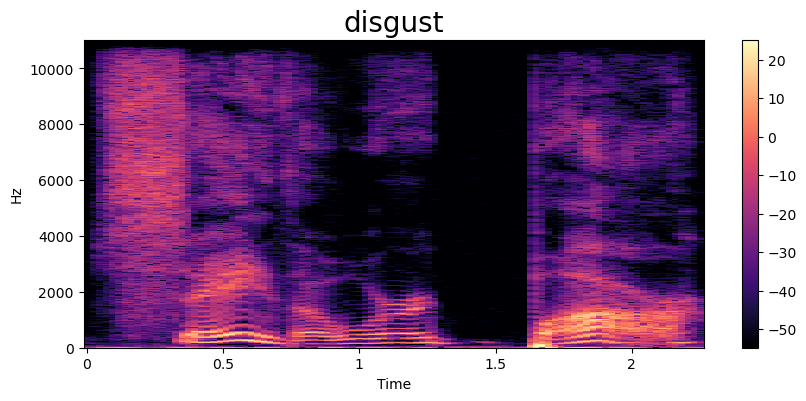

In [13]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

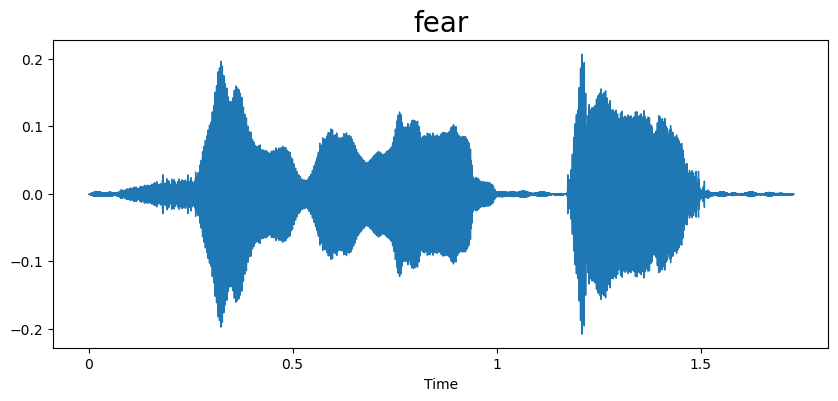

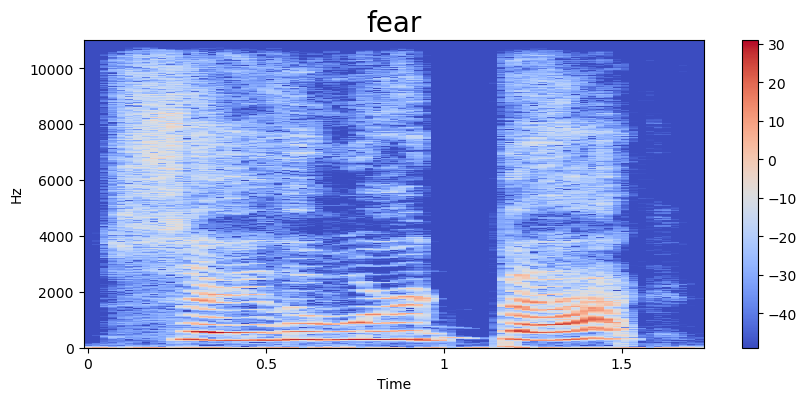

In [14]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

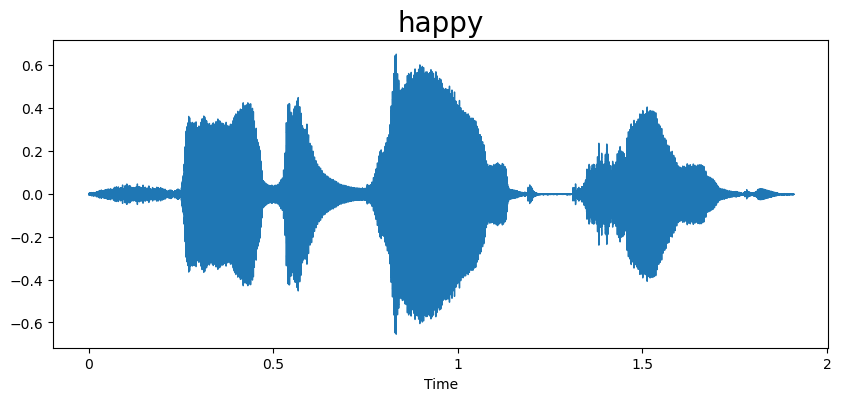

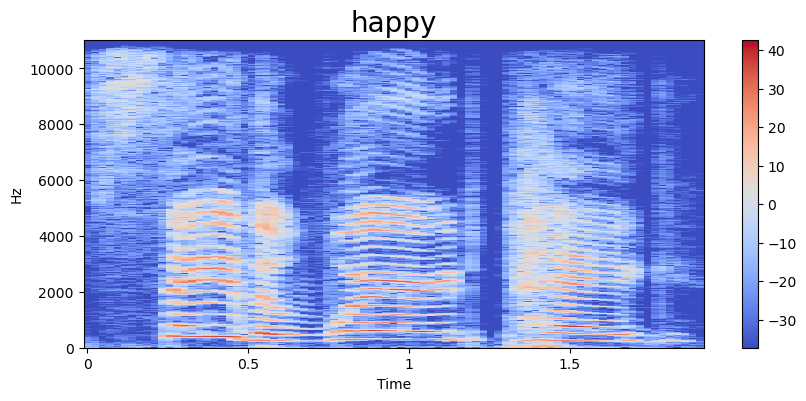

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[320]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

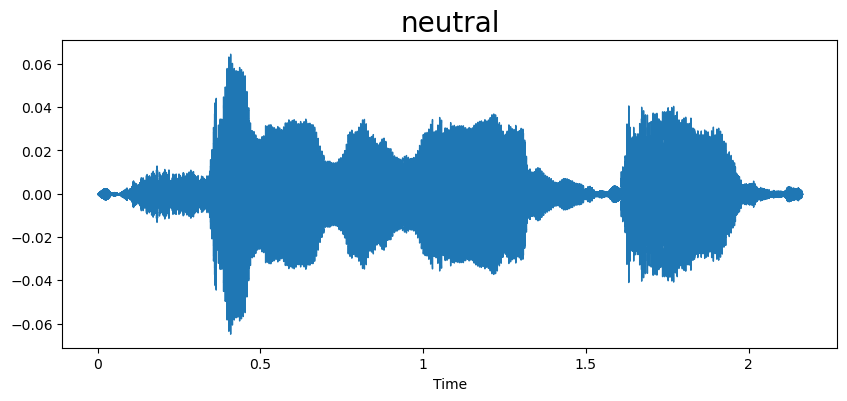

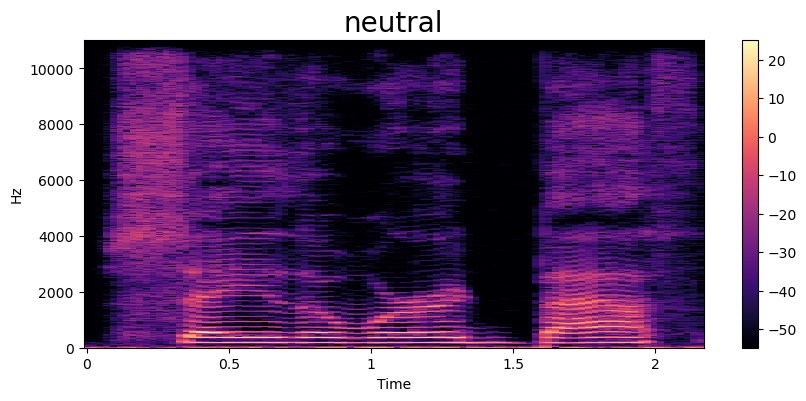

In [16]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[3]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

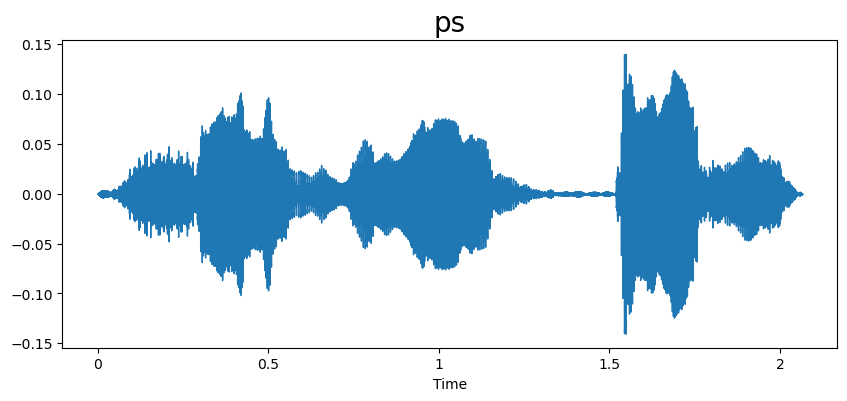

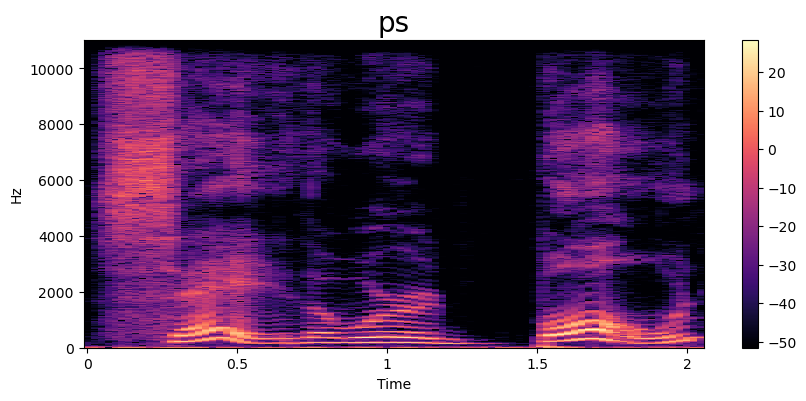

In [17]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[8]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

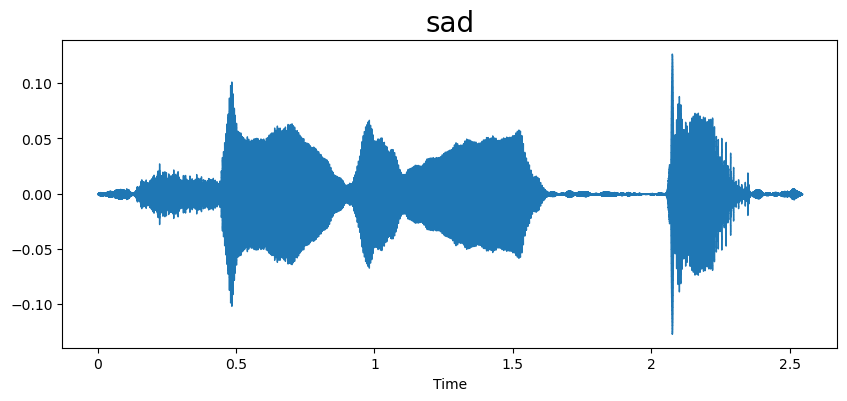

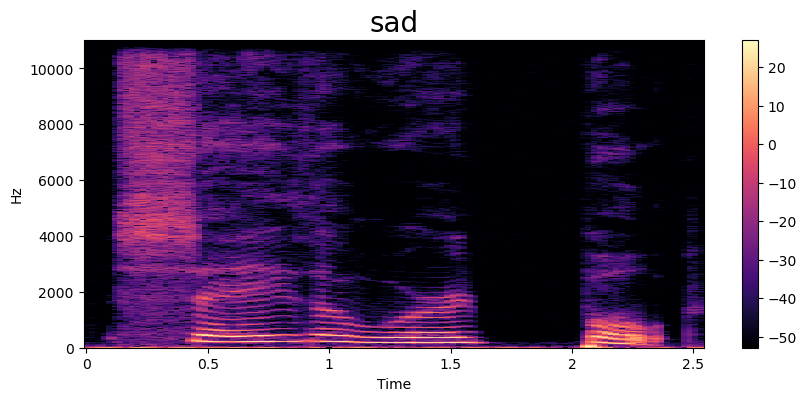

In [18]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[7]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

**Feature Extraction**

In [19]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename, duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101603e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633800e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115908e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722581e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [21]:
each_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
each_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.124, 1.5550474, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092943, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [23]:
##converting into two dimensional array
x =[x for x in each_mfcc]
x=np.array(x)
x.shape

(2800, 40)

In [24]:
##input splits
x=np.expand_dims(x,-1)
x.shape

(2800, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y=encoder.fit_transform(df[['label']])

In [26]:
y=y.toarray()

In [27]:
y.shape

(2800, 7)

**Creating LSTM model**

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [29]:
model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation ='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax'),##because we converting into categorical
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [60]:
x_train.shape

(2240, 40, 1)

In [32]:
##Train the model
history=model.fit(x_train,y_train,epochs=100,batch_size=512,validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - accuracy: 0.1875 - loss: 1.8760 - val_accuracy: 0.3147 - val_loss: 1.7368
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step - accuracy: 0.3006 - loss: 1.7312 - val_accuracy: 0.3661 - val_loss: 1.6087
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.3578 - loss: 1.5971 - val_accuracy: 0.4286 - val_loss: 1.4758
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.4158 - loss: 1.4918 - val_accuracy: 0.4621 - val_loss: 1.3475
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.4531 - loss: 1.3729 - val_accuracy: 0.4911 - val_loss: 1.2420
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.5104 - loss: 1.2373 - val_accuracy: 0.5915 - val_loss: 1.1004
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.5158 - loss: 1.1617 - val_accuracy: 0.6272 - val_loss: 1.0049
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.6246 - loss: 1.0399 - val_accuracy: 0.7054 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9873 - loss: 0.0474 - val_accuracy: 0.9777 - val_loss: 0.0639
Epoch 52/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.9870 - loss: 0.0418 - val_accuracy: 0.9821 - val_loss: 0.0572
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.9876 - loss: 0.0448 - val_accuracy: 0.9799 - val_loss: 0.0611
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9901 - loss: 0.0349 - val_accuracy: 0.9777 - val_loss: 0.0674
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9821 - val_loss: 0.0587
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9851 - loss: 0.0518 - val_accuracy: 0.9732 - val_loss: 0.0705
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9859 - loss: 0.0438 - val_accuracy: 0.9665 - val_loss: 0.1030
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9860 - loss: 0.0448 - val_accuracy: 0.9844 - val_lo

In [33]:
loss,accuracy=model.evaluate(x_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9742 - loss: 0.1491


In [34]:
print("Accuracy: ",accuracy)

Accuracy:  0.9750000238418579


**Plot the results**

In [35]:
epochs=list(range(100))
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

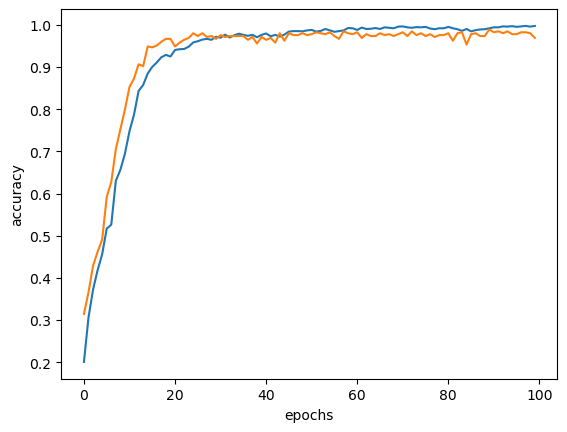

In [36]:
plt.plot(epochs, acc, label='train_accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

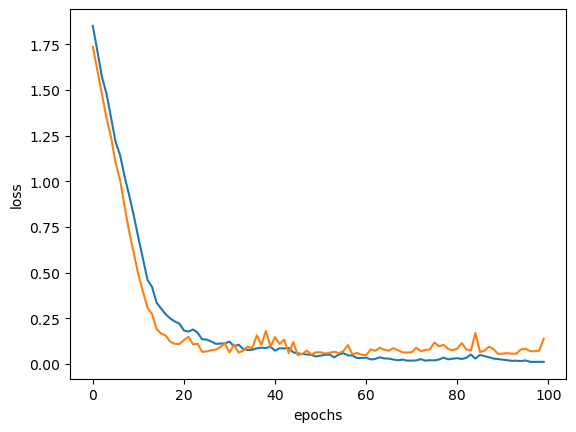

In [37]:
loss = history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**Creating Ann model**

In [38]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [39]:
df1 = pd.DataFrame({
    'MFCC':each_mfcc,
    'Label': labels
})
df1

,MFCC,Label
0,"[-396.9862, 77.44054, -19.59279, -21.666689, -...",angry
1,"[-465.73267, 98.77373, 0.6560089, -32.74544, -...",angry
2,"[-429.79196, 46.124, 1.5550474, -0.21709539, 2...",angry
3,"[-403.46118, 76.32369, -12.531774, -22.288858,...",angry
4,"[-434.05756, 77.4455, 10.865501, 16.092943, 8....",angry
...,...,...
2795,"[-406.48053, 80.379875, 32.462395, 46.579094, ...",sad
2796,"[-426.90918, 102.54757, 24.800041, 43.048096, ...",sad
2797,"[-378.50494, 80.91062, 35.300533, 39.74792, -4...",sad
2798,"[-434.8618, 89.906364, 28.37326, 39.57707, -2....",sad


In [40]:
df1.shape

(2800, 2)

In [41]:
new_df = df1.sample(2800)
new_df['Label'].value_counts()

angry      400
ps         400
disgust    400
sad        400
neutral    400
fear       400
happy      400
Name: Label, dtype: int64

In [42]:
#Label Encoding
lbl = LabelEncoder()
new_df['Label'] = lbl.fit_transform(new_df['Label'])
new_df.head()

,MFCC,Label
13,"[-408.56805, 98.46726, -4.5352473, -36.26228, ...",0
2593,"[-388.06284, 63.73419, -5.9688168, 9.926488, -...",5
1713,"[-452.0155, 100.76413, 5.724681, 21.54626, -10...",1
2771,"[-379.65738, 86.77609, 27.429417, 20.115702, -...",6
57,"[-436.85968, 65.910576, -1.0731965, -1.1962826...",0


In [43]:
X = np.array(new_df['MFCC'].tolist())
Y = np.array(new_df['Label'].tolist())

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [45]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(40,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(14,activation='softmax'))

model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')


In [46]:
mistory=model.fit(X_train,Y_train,epochs=50,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1871 - loss: 15.2635 - val_accuracy: 0.4679 - val_loss: 3.5020
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5673 - loss: 2.2142 - val_accuracy: 0.7464 - val_loss: 0.6230
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8270 - loss: 0.4719 - val_accuracy: 0.9161 - val_loss: 0.2091
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9268 - loss: 0.2304 - val_accuracy: 0.9250 - val_loss: 0.1940
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9525 - loss: 0.1500 - val_accuracy: 0.9500 - val_loss: 0.1396
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9598 - loss: 0.1395 - val_accuracy: 0.9625 - val_loss: 0.1041
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - loss: 0.0966 - val_accuracy: 0.9750 - val_loss: 0.0881
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9851 - loss: 0.0774 - val_accuracy: 0.9804 - val_los

In [47]:
loss,accuracy=model.evaluate(X_test,Y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0164 


In [48]:
epochs=list(range(50))
acc = mistory.history['accuracy']
val_acc=mistory.history['val_accuracy']

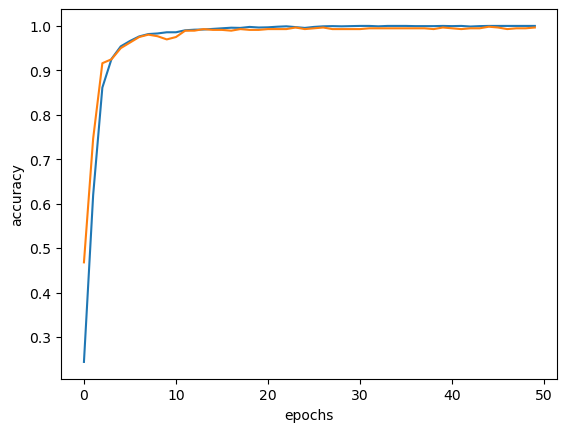

In [49]:
plt.plot(epochs, acc, label='train_accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

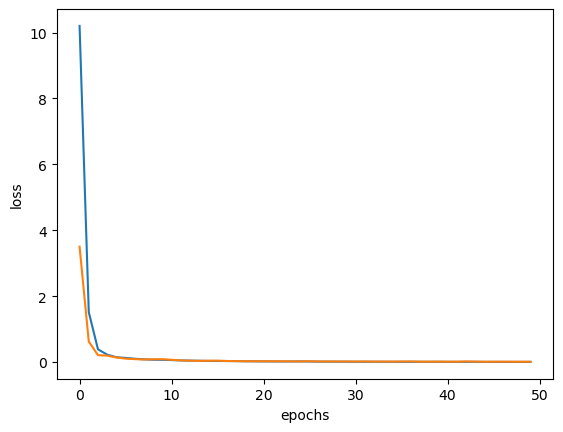

In [50]:
loss = mistory.history['loss']
val_loss=mistory.history['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**Convolutional neural network**

In [51]:
from keras.layers import Flatten
from tensorflow.keras.layers import Conv1D

In [52]:
CNN_model = Sequential()

CNN_model.add(Conv1D(16,5,input_shape=(40, 1), activation='relu'))

CNN_model.add(Conv1D(32,5,activation='relu'))

CNN_model.add(Conv1D(64,5,padding='same',activation='relu'))
CNN_model.add(Dropout(0.1))

CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(7, activation='softmax'))

In [53]:
CNN_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
eistory=CNN_model.fit(x_train,y_train,epochs=100,batch_size=512,validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.2048 - loss: 2.6747 - val_accuracy: 0.5469 - val_loss: 1.4606
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5414 - loss: 1.3817 - val_accuracy: 0.7723 - val_loss: 0.9424
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6960 - loss: 0.9122 - val_accuracy: 0.8482 - val_loss: 0.6188
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8067 - loss: 0.6284 - val_accuracy: 0.9375 - val_loss: 0.3519
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8779 - loss: 0.4046 - val_accuracy: 0.9487 - val_loss: 0.2038
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8985 - loss: 0.2849 - val_accuracy: 0.9621 - val_loss: 0.1386
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9355 - loss: 0.2069 - val_accuracy: 0.9710 - val_loss: 0.0922
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9487 - loss: 0.1430 - val_accuracy: 0.9821 - val_loss

Epoch 52/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9995 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 9.0306e-04 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 59/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9991 - loss: 0.0020 - val_accuracy: 1.0000

In [55]:
loss,accuracy=CNN_model.evaluate(x_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0022


In [56]:
epochs=list(range(100))
acc = eistory.history['accuracy']
val_acc=eistory.history['val_accuracy']

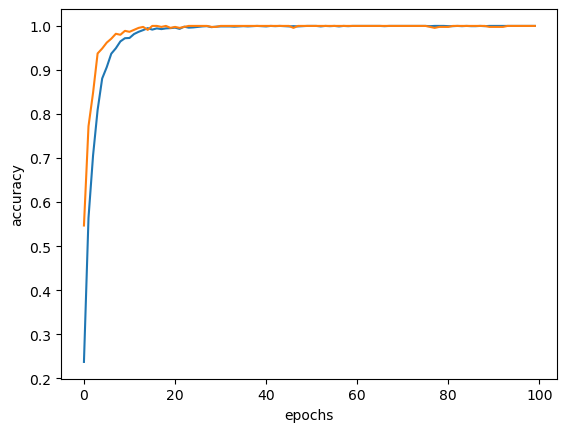

In [57]:
plt.plot(epochs, acc, label='train_accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

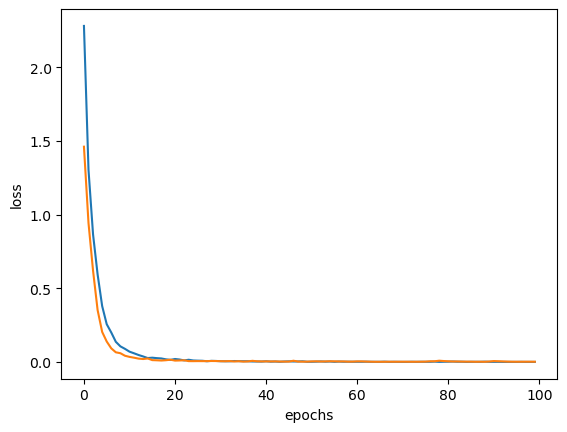

In [58]:
loss = eistory.history['loss']
val_loss=eistory.history['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()